In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
import numpy as np

# --- 1. Define File and Group Columns for Subplots ---
filename = './onway/episode_logs2/episode_0003_log.csv'
# filename = './onway/episode_logs0/episode_0001_log.csv'
# filename = './onway/episode_logs1/episode_0010_log.csv'


subplot_groups = {
    'Temporal Metrics': ['days_since_last_rain', 'days_since_last_irrigation'],
    'Crop Growth Status': ['phenological_stage', 'leaf_area_index', 'total_biomass', 'HarvestIndex', 'water_stress_factor'],
    'Soil & Water Conditions': ['soil_water_avg', 'available_water_fraction', 'daily_drainage'],
    'Weather Context': ['temperature_avg', 'rainfall_7day', 'forecast'],
    'Management History': ['last_irrigation_amount', 'cumulative_irrigation', 'totalnumberIrrigation', 'action_irrigation_mm']
}

# --- 2. Assign each subplot a distinct colormap ---
colormaps = {
    'Temporal Metrics': plt.cm.plasma,
    'Crop Growth Status': plt.cm.inferno,
    'Soil & Water Conditions': plt.cm.cividis,
    'Weather Context': plt.cm.viridis,
    'Management History': plt.cm.magma
}

# --- 3. Create consistent color map ---
color_map = {}
for title, columns in subplot_groups.items():
    cmap = colormaps[title]
    n = len(columns)
    colors = cmap(np.linspace(0.15, 0.85, n))  # Avoid washed-out or dark extremes
    for col, c in zip(columns, colors):
        color_map[col] = c

# --- 4. Read CSV and Prepare Data ---
if os.path.exists(filename):
    df = pd.read_csv(filename)

    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    soil_cols = ['soil_water_content_0_30cm', 'soil_water_content_30_60cm', 'soil_water_content_60_100cm']
    df['soil_water_avg'] = df[soil_cols].mean(axis=1)

    # --- 5. Plot setup ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(nrows=len(subplot_groups), ncols=1, figsize=(15, 20), sharex=True)

    print("Normalizing and plotting variables on separate subplots...")

    for ax, (title, columns) in zip(axes, subplot_groups.items()):
        ax.set_title(title, fontsize=14)
        ax.set_ylabel('Normalized Value (0–100)')
        ax.set_ylim(0, 100)
        ax.grid(True, linestyle='--', linewidth=0.5)

        for column in columns:
            if column in df.columns:
                min_val, max_val = df[column].min(), df[column].max()
                scaled = ((df[column] - min_val) / (max_val - min_val) * 100) if max_val > min_val else [50]*len(df)
                ax.plot(df['DAP'], scaled, label=column, lw=2, color=color_map[column])

        ax.legend(loc='best', fontsize=9, frameon=True)

    axes[-1].set_xlabel('DAP (Days After Planting)', fontsize=14)
    fig.suptitle('Normalized Analysis of Variables Over the Growing Season (0–100 Scale)', fontsize=20, y=1.02)
    plt.tight_layout()

    output_filename = 'normalized_vibrant_subplots.png'
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()

    print(f"\nGraph successfully saved as '{output_filename}'")

else:
    print(f"Error: The file '{filename}' was not found.")


Normalizing and plotting variables on separate subplots...


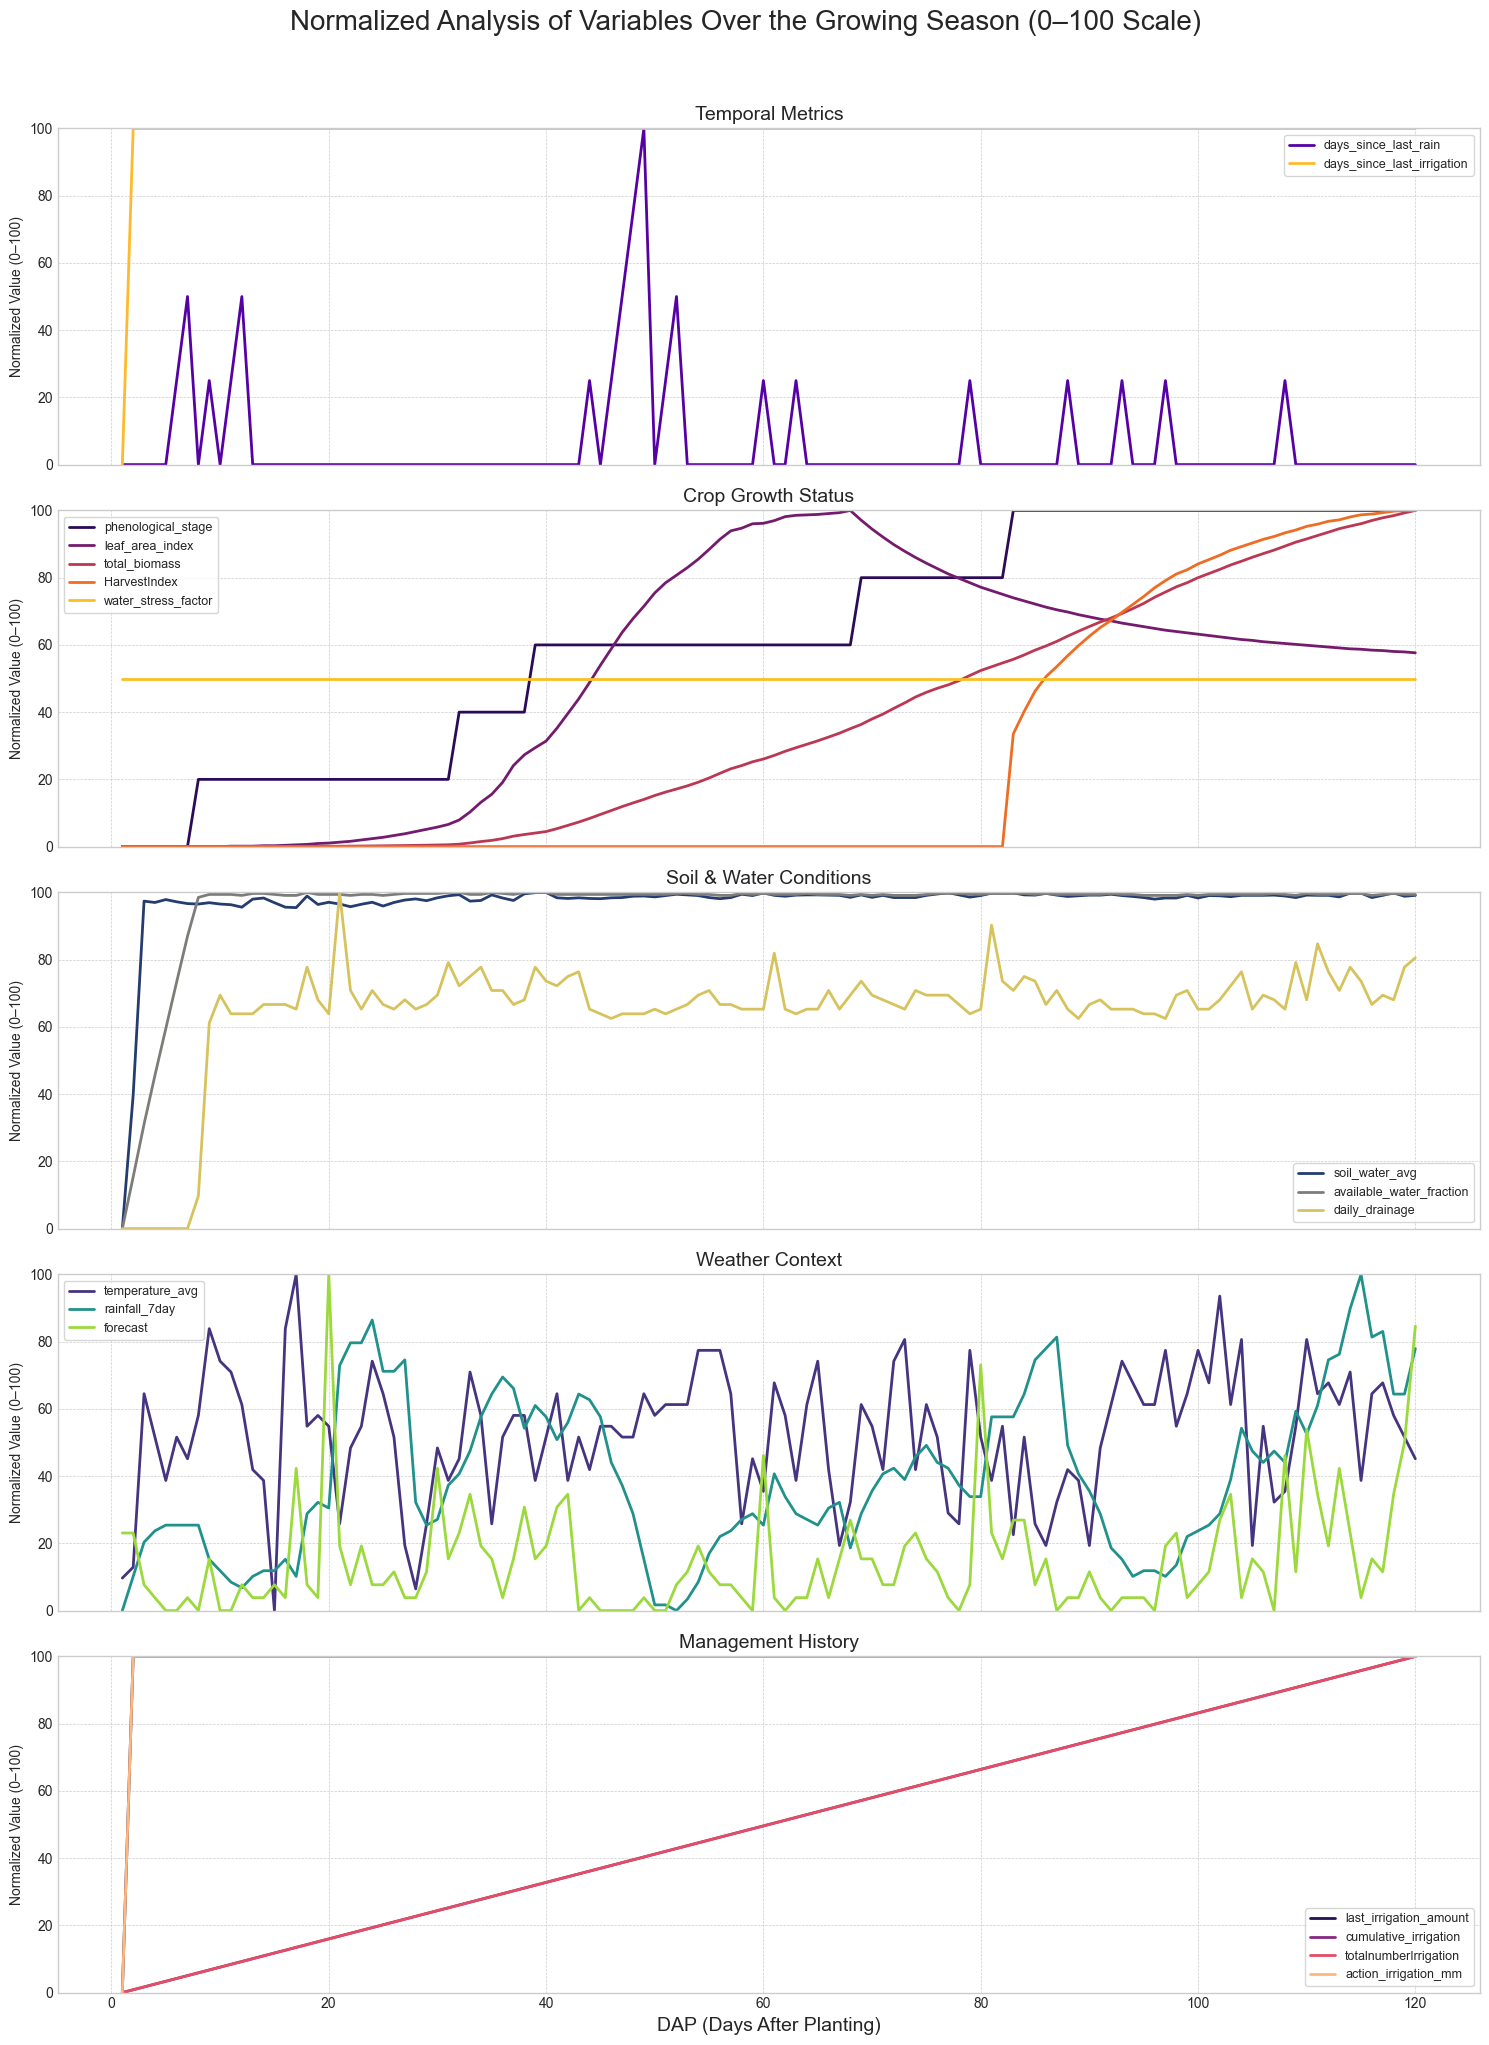


Graph successfully saved as 'normalized_vibrant_subplots.png'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
import numpy as np

# --- 1. Define File and Group Columns for Subplots ---
filename = r'D:\Final-Year-Project\rl-trails\evaluation_workspace\episode_logs\episode_0001_log.csv'
# filename = r'./onway/episode_logs2/episode_0003_log.csv'
# filename = r'./onway/episode_logs0/episode_0001_log.csv'
# filename = r'./onway/episode_logs1/episode_0010_log.csv'


subplot_groups = {
    'Temporal Metrics': ['days_since_last_rain', 'days_since_last_irrigation'],
    'Crop Growth Status': ['phenological_stage', 'leaf_area_index', 'total_biomass', 'HarvestIndex', 'water_stress_factor'],
    'Soil & Water Conditions': ['soil_water_avg', 'available_water_fraction', 'daily_drainage'],
    'Weather Context': ['temperature_avg', 'rainfall_7day', 'forecast'],
    'Management History': ['last_irrigation_amount', 'cumulative_irrigation', 'totalnumberIrrigation', 'action_irrigation_mm']
}

# --- 2. Assign each subplot a distinct colormap ---
colormaps = {
    'Temporal Metrics': plt.cm.plasma,
    'Crop Growth Status': plt.cm.inferno,
    'Soil & Water Conditions': plt.cm.cividis,
    'Weather Context': plt.cm.viridis,
    'Management History': plt.cm.magma
}

# --- 3. Create consistent color map ---
color_map = {}
for title, columns in subplot_groups.items():
    cmap = colormaps[title]
    n = len(columns)
    colors = cmap(np.linspace(0.15, 0.85, n))  # Avoid washed-out or dark extremes
    for col, c in zip(columns, colors):
        color_map[col] = c

# --- 4. Read CSV and Prepare Data ---
if os.path.exists(filename):
    df = pd.read_csv(filename)

    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    soil_cols = ['soil_water_content_0_30cm', 'soil_water_content_30_60cm', 'soil_water_content_60_100cm']
    df['soil_water_avg'] = df[soil_cols].mean(axis=1)

    # --- 5. Plot setup ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(nrows=len(subplot_groups), ncols=1, figsize=(15, 20), sharex=True)

    print("Normalizing and plotting variables on separate subplots...")

    for ax, (title, columns) in zip(axes, subplot_groups.items()):
        ax.set_title(title, fontsize=14)
        ax.set_ylabel('Normalized Value (0–100)')
        ax.set_ylim(0, 100)
        ax.grid(True, linestyle='--', linewidth=0.5)

        for column in columns:
            if column in df.columns:
                min_val, max_val = df[column].min(), df[column].max()
                scaled = ((df[column] - min_val) / (max_val - min_val) * 100) if max_val > min_val else [50]*len(df)
                ax.plot(df['DAP'], scaled, label=column, lw=2, color=color_map[column])

        ax.legend(loc='best', fontsize=9, frameon=True)

    axes[-1].set_xlabel('DAP (Days After Planting)', fontsize=14)
    fig.suptitle('Normalized Analysis of Variables Over the Growing Season (0–100 Scale)', fontsize=20, y=1.02)
    plt.tight_layout()

    output_filename = 'normalized_vibrant_subplots.png'
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()

    print(f"\nGraph successfully saved as '{output_filename}'")

else:
    print(f"Error: The file '{filename}' was not found.")


Normalizing and plotting variables on the new 3x2 grid...


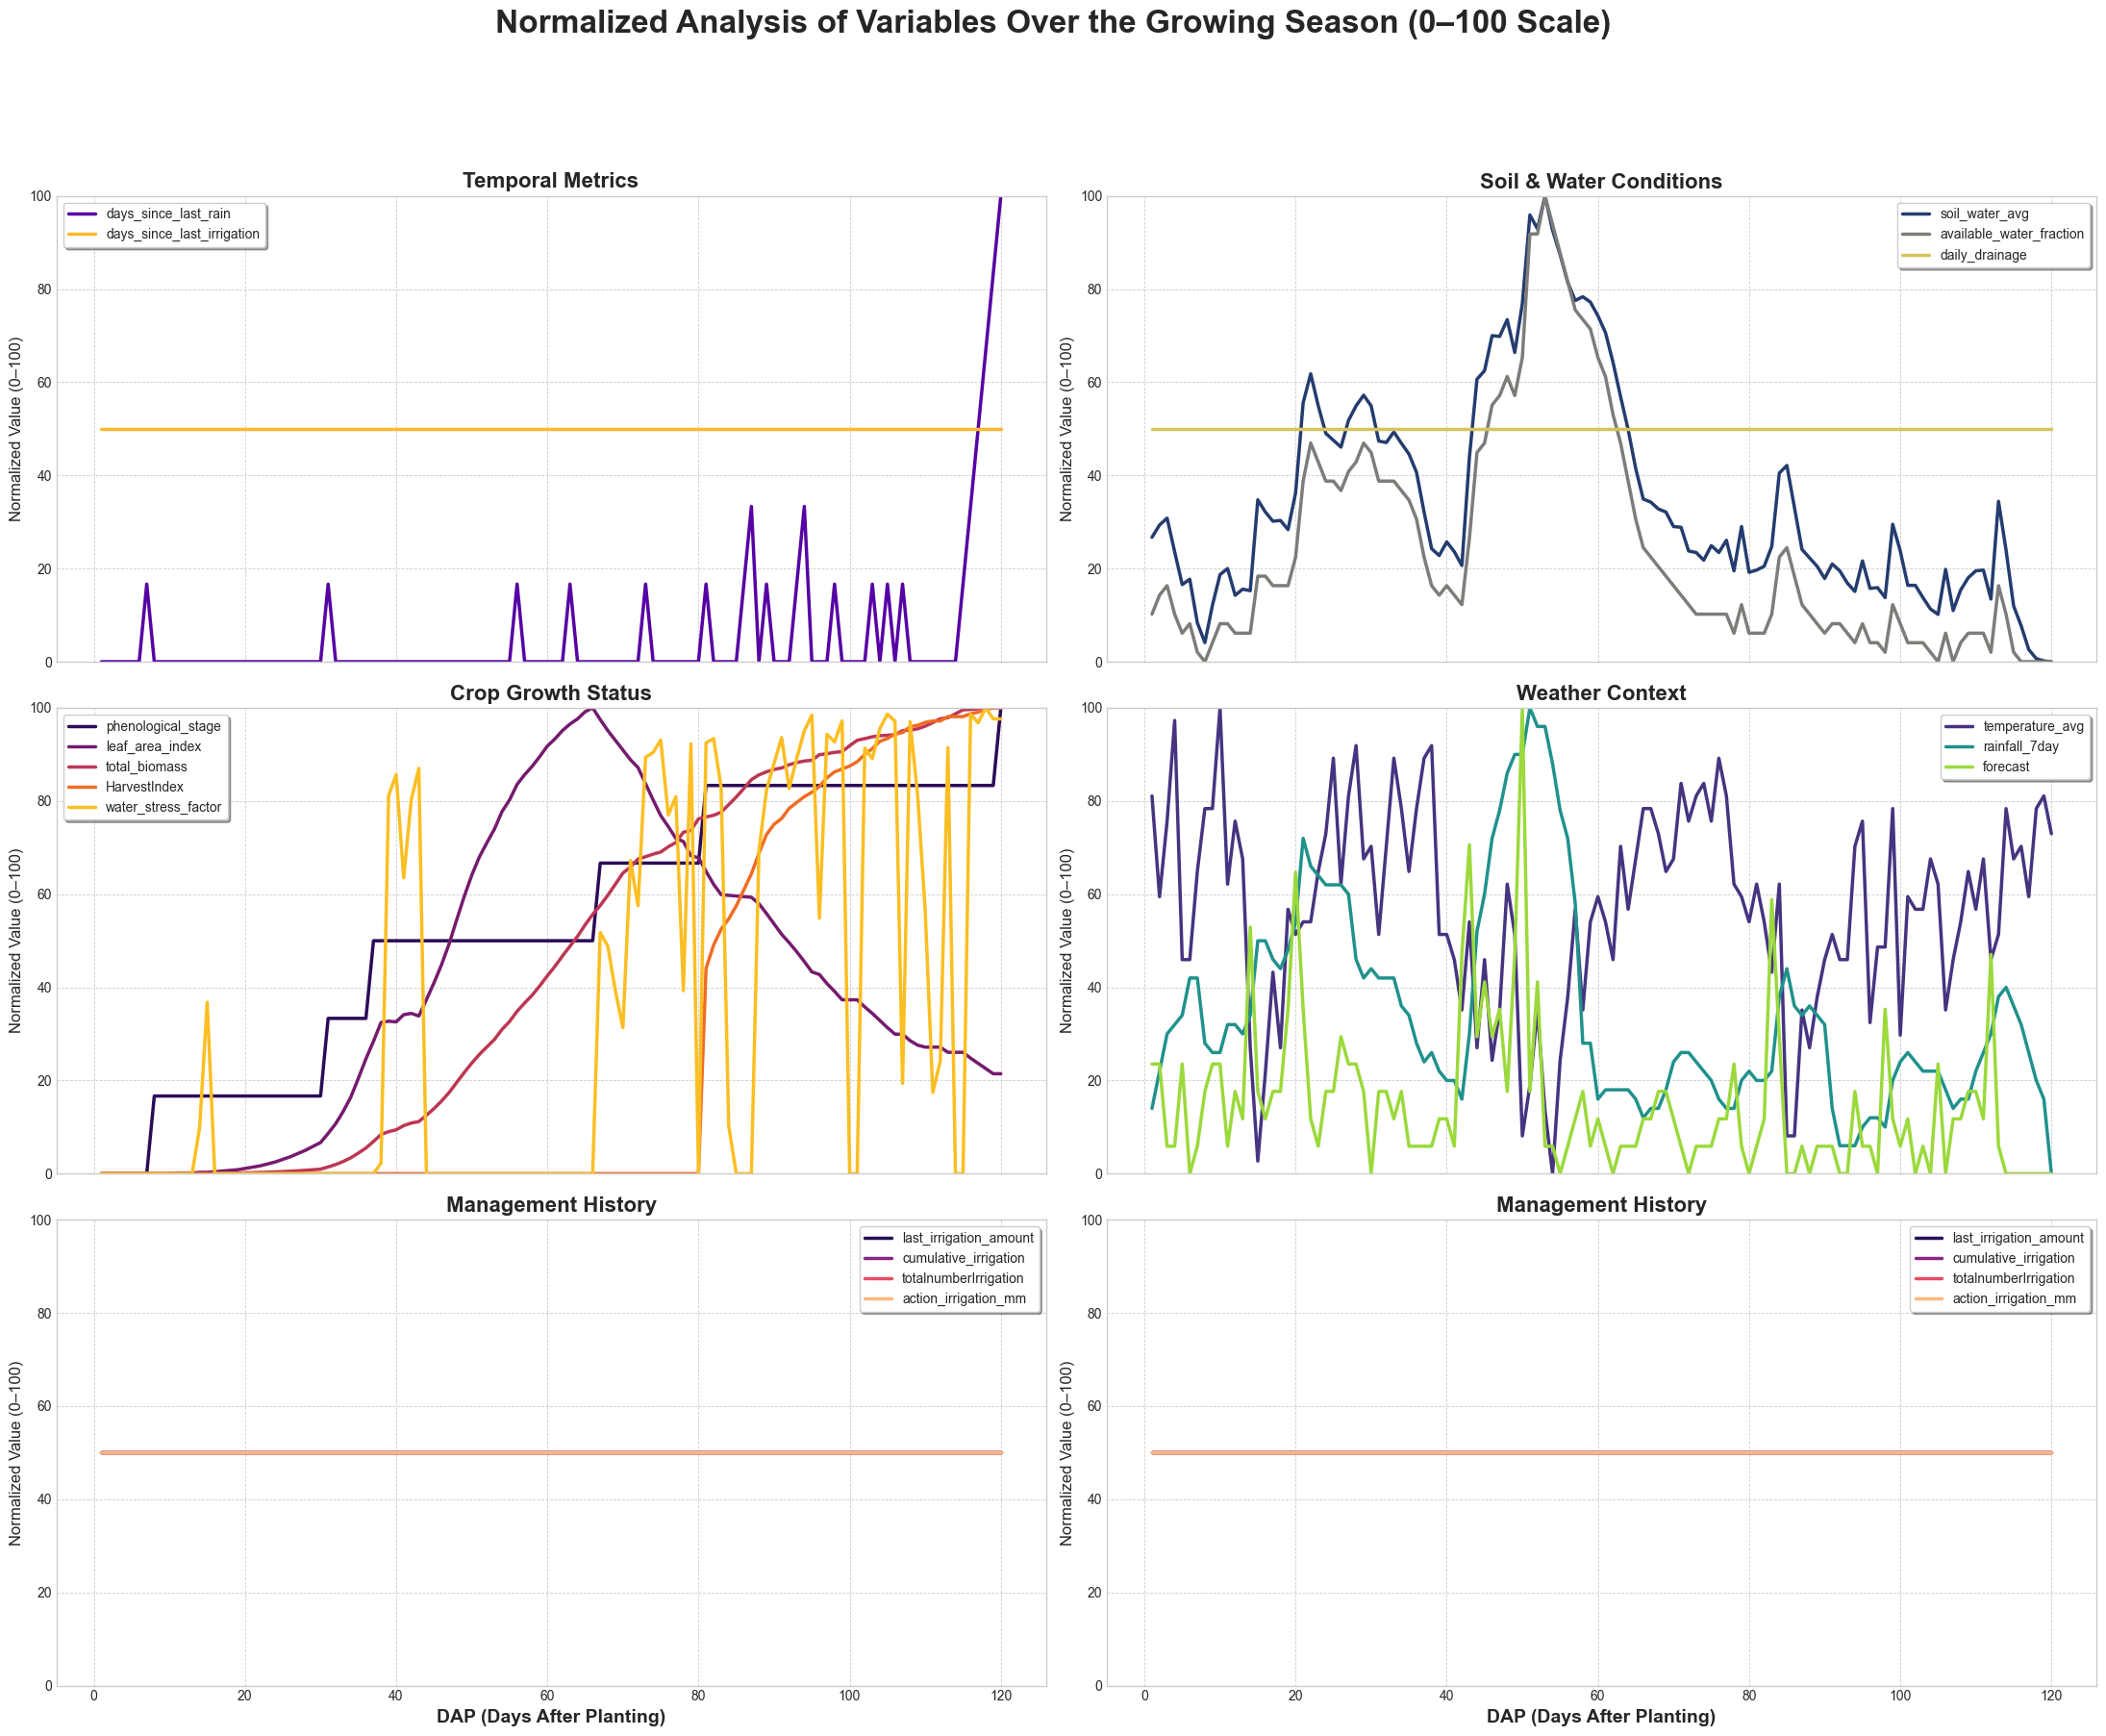


Graph successfully saved as 'normalized_grid_plot.png'


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- 1. Define File and Group Columns for Subplots ---
# Ensure this file path is correct for your system
# filename = './onway/episode_logs2/episode_0003_log.csv'
# filename = './onway/episode_logs0/episode_0001_log.csv'
filename = './onway/episode_logs1/episode_0010_log.csv'

subplot_groups = {
    'Temporal Metrics': ['days_since_last_rain', 'days_since_last_irrigation'],
    'Crop Growth Status': ['phenological_stage', 'leaf_area_index', 'total_biomass', 'HarvestIndex', 'water_stress_factor'],
    'Soil & Water Conditions': ['soil_water_avg', 'available_water_fraction', 'daily_drainage'],
    'Weather Context': ['temperature_avg', 'rainfall_7day', 'forecast'],
    'Management History': ['last_irrigation_amount', 'cumulative_irrigation', 'totalnumberIrrigation', 'action_irrigation_mm']
}

# --- 2. Assign each subplot a distinct colormap ---
colormaps = {
    'Temporal Metrics': plt.cm.plasma,
    'Crop Growth Status': plt.cm.inferno,
    'Soil & Water Conditions': plt.cm.cividis,
    'Weather Context': plt.cm.viridis,
    'Management History': plt.cm.magma
}

# --- 3. Create consistent color map ---
color_map = {}
for title, columns in subplot_groups.items():
    cmap = colormaps[title]
    n = len(columns)
    colors = cmap(np.linspace(0.15, 0.85, n))  # Avoid washed-out or dark extremes
    for col, c in zip(columns, colors):
        color_map[col] = c

# --- 4. Read CSV and Prepare Data ---
if os.path.exists(filename):
    df = pd.read_csv(filename)

    # Create 'daily_precip' if it doesn't exist
    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    # Calculate average soil water content
    soil_cols = ['soil_water_content_0_30cm', 'soil_water_content_30_60cm', 'soil_water_content_60_100cm']
    df['soil_water_avg'] = df[soil_cols].mean(axis=1)

    # --- 5. Plot setup (3x2 Grid Layout) ---
    plt.style.use('seaborn-v0_8-whitegrid')
    # Create a 3x2 grid of subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 18), sharex=True)
    # Flatten the 2D axes array for easier iteration
    axes_flat = axes.flatten()

    print("Normalizing and plotting variables on the new 3x2 grid...")

    # Define the order of plots to match your requested layout
    plot_order = [
        'Temporal Metrics', 'Soil & Water Conditions',
        'Crop Growth Status', 'Weather Context',
        'Management History', 'Management History'  # Duplicating as requested
    ]

    # Loop through the plot order and the flattened axes to create each subplot
    for i, title in enumerate(plot_order):
        ax = axes_flat[i]
        columns = subplot_groups.get(title, [])

        ax.set_title(title, fontsize=16, weight='bold')
        ax.set_ylabel('Normalized Value (0–100)', fontsize=12)
        ax.set_ylim(0, 100)
        ax.grid(True, which='both', linestyle='--', linewidth=0.6)

        for column in columns:
            if column in df.columns:
                min_val, max_val = df[column].min(), df[column].max()
                # Normalize data to a 0-100 scale
                if max_val > min_val:
                    scaled = ((df[column] - min_val) / (max_val - min_val) * 100)
                else: # If all values are the same, plot at 50% to keep it visible
                    scaled = [50] * len(df)
                
                ax.plot(df['DAP'], scaled, label=column, lw=2.5, color=color_map.get(column))

        ax.legend(loc='best', fontsize=10, frameon=True, shadow=True)

    # Set common X-axis labels only for the bottom-row plots
    for ax in axes[2, :]: # This targets the last row
        ax.set_xlabel('DAP (Days After Planting)', fontsize=14, weight='bold')

    # Add a comprehensive main title for the entire figure
    fig.suptitle('Normalized Analysis of Variables Over the Growing Season (0–100 Scale)', fontsize=24, y=1.03, weight='bold')
    
    # Adjust layout to prevent titles and labels from overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])

    # Save the final plot to a file
    output_filename = 'normalized_grid_plot.png'
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()

    print(f"\nGraph successfully saved as '{output_filename}'")

else:
    print(f"Error: The file '{filename}' was not found.")